In [ ]:
#request ->www
#Use beautiful sup -> www as 'lxml'
#corpus sup.find('a' {'name': 'Research papers'}) (also use ' a', 'ol', 'li')
#find next 
#find all
#sth with 'hvet', 'b'

In [1]:
%matplotlib inline
from bs4 import BeautifulSoup
from urllib.request import urlopen
import lxml
import requests
import networkx as nx
import itertools
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import re

In [3]:
url = "http://prac.im.pwr.wroc.pl/~hugo/HSC/Publications/Publications"
html2 = urlopen(url)
html = requests.get(url)
soup = BeautifulSoup(html2.read(), 'lxml')

<?xml-stylesheet type="text/xsl" href="publications.xsl"?>
<page><group><name>Books</name><year><doc><title>Applied Condition Monitoring. Cyclostationarity: Theory and Methods - III</title><grant>no</grant><journal>Springer International Publishing</journal><year>2017</year><type>html</type><link>Ksiazki.html</link><authors><author hsc="no">F.Chaari</author><author hsc="no">J. Leskow</author><author hsc="no">A. Napolitano</author><author hsc="no">R.Zimroz</author><author hsc="yes">A.Wylomanska</author></authors></doc><doc><title> Hugo Steinhaus Mathematician for All Seasons. Recollections and Notes  Vol.2 (1945-1968)</title><grant>no</grant><journal>Birkhauser</journal><year>2016</year><type>html</type><link>Ksiazki.html</link><authors><author hsc="no">R.G.Burns</author><author hsc="no">I.Szymaniec</author><author hsc="yes">A.Weron</author></authors></doc><doc><title> Hugo Steinhaus Mathematician for All Seasons. Recollections and Notes  Vol.1 (1887-1945)</title><grant>no</grant><journ

In [29]:
groups = soup.find_all('group')
for i in range(len(groups)):
    if groups[i].find_all('name')[0].get_text() == 'Research papers':
        authors = groups[i].find_all('authors')

In [30]:
for i in range(len(authors)):
    new_list = []
    for j in range(len(authors[i])):
        if authors[i].find_all('author')[j].get('hsc')=='yes':
            author = authors[i].find_all('author')[j].get_text()
            author = re.sub(' ', '', author)
            author = re.sub('Wylomanska', 'Wyłomańska', author)
            author = re.sub('Loch', 'Loch-Olszewska', author)
            author = re.sub('Zak', 'Żak', author)
            new_list.append(author)
    authors[i] = new_list

In [32]:
edges = []
for i in range(len(authors)):
    for pair in itertools.combinations(authors[i],2):
        edges.append(tuple(sorted(pair)))

In [39]:
edges_dict = Counter(edges)

In [42]:
nodes_dict = dict()
for i in range(len(authors)):
    nodes_dict = Counter(authors[i]) + Counter(nodes_dict)

In [43]:
G = nx.Graph()
G.add_nodes_from(list(nodes_dict.keys()))
list_of_edges = list(edges_dict.items())
for i in range(len(edges_dict)):
    edge = list_of_edges[i]
    G.add_edge(edge[0][0], edge[0][1], weight = edge[1])
weights = [G[u][v]['weight'] for u,v in G.edges]

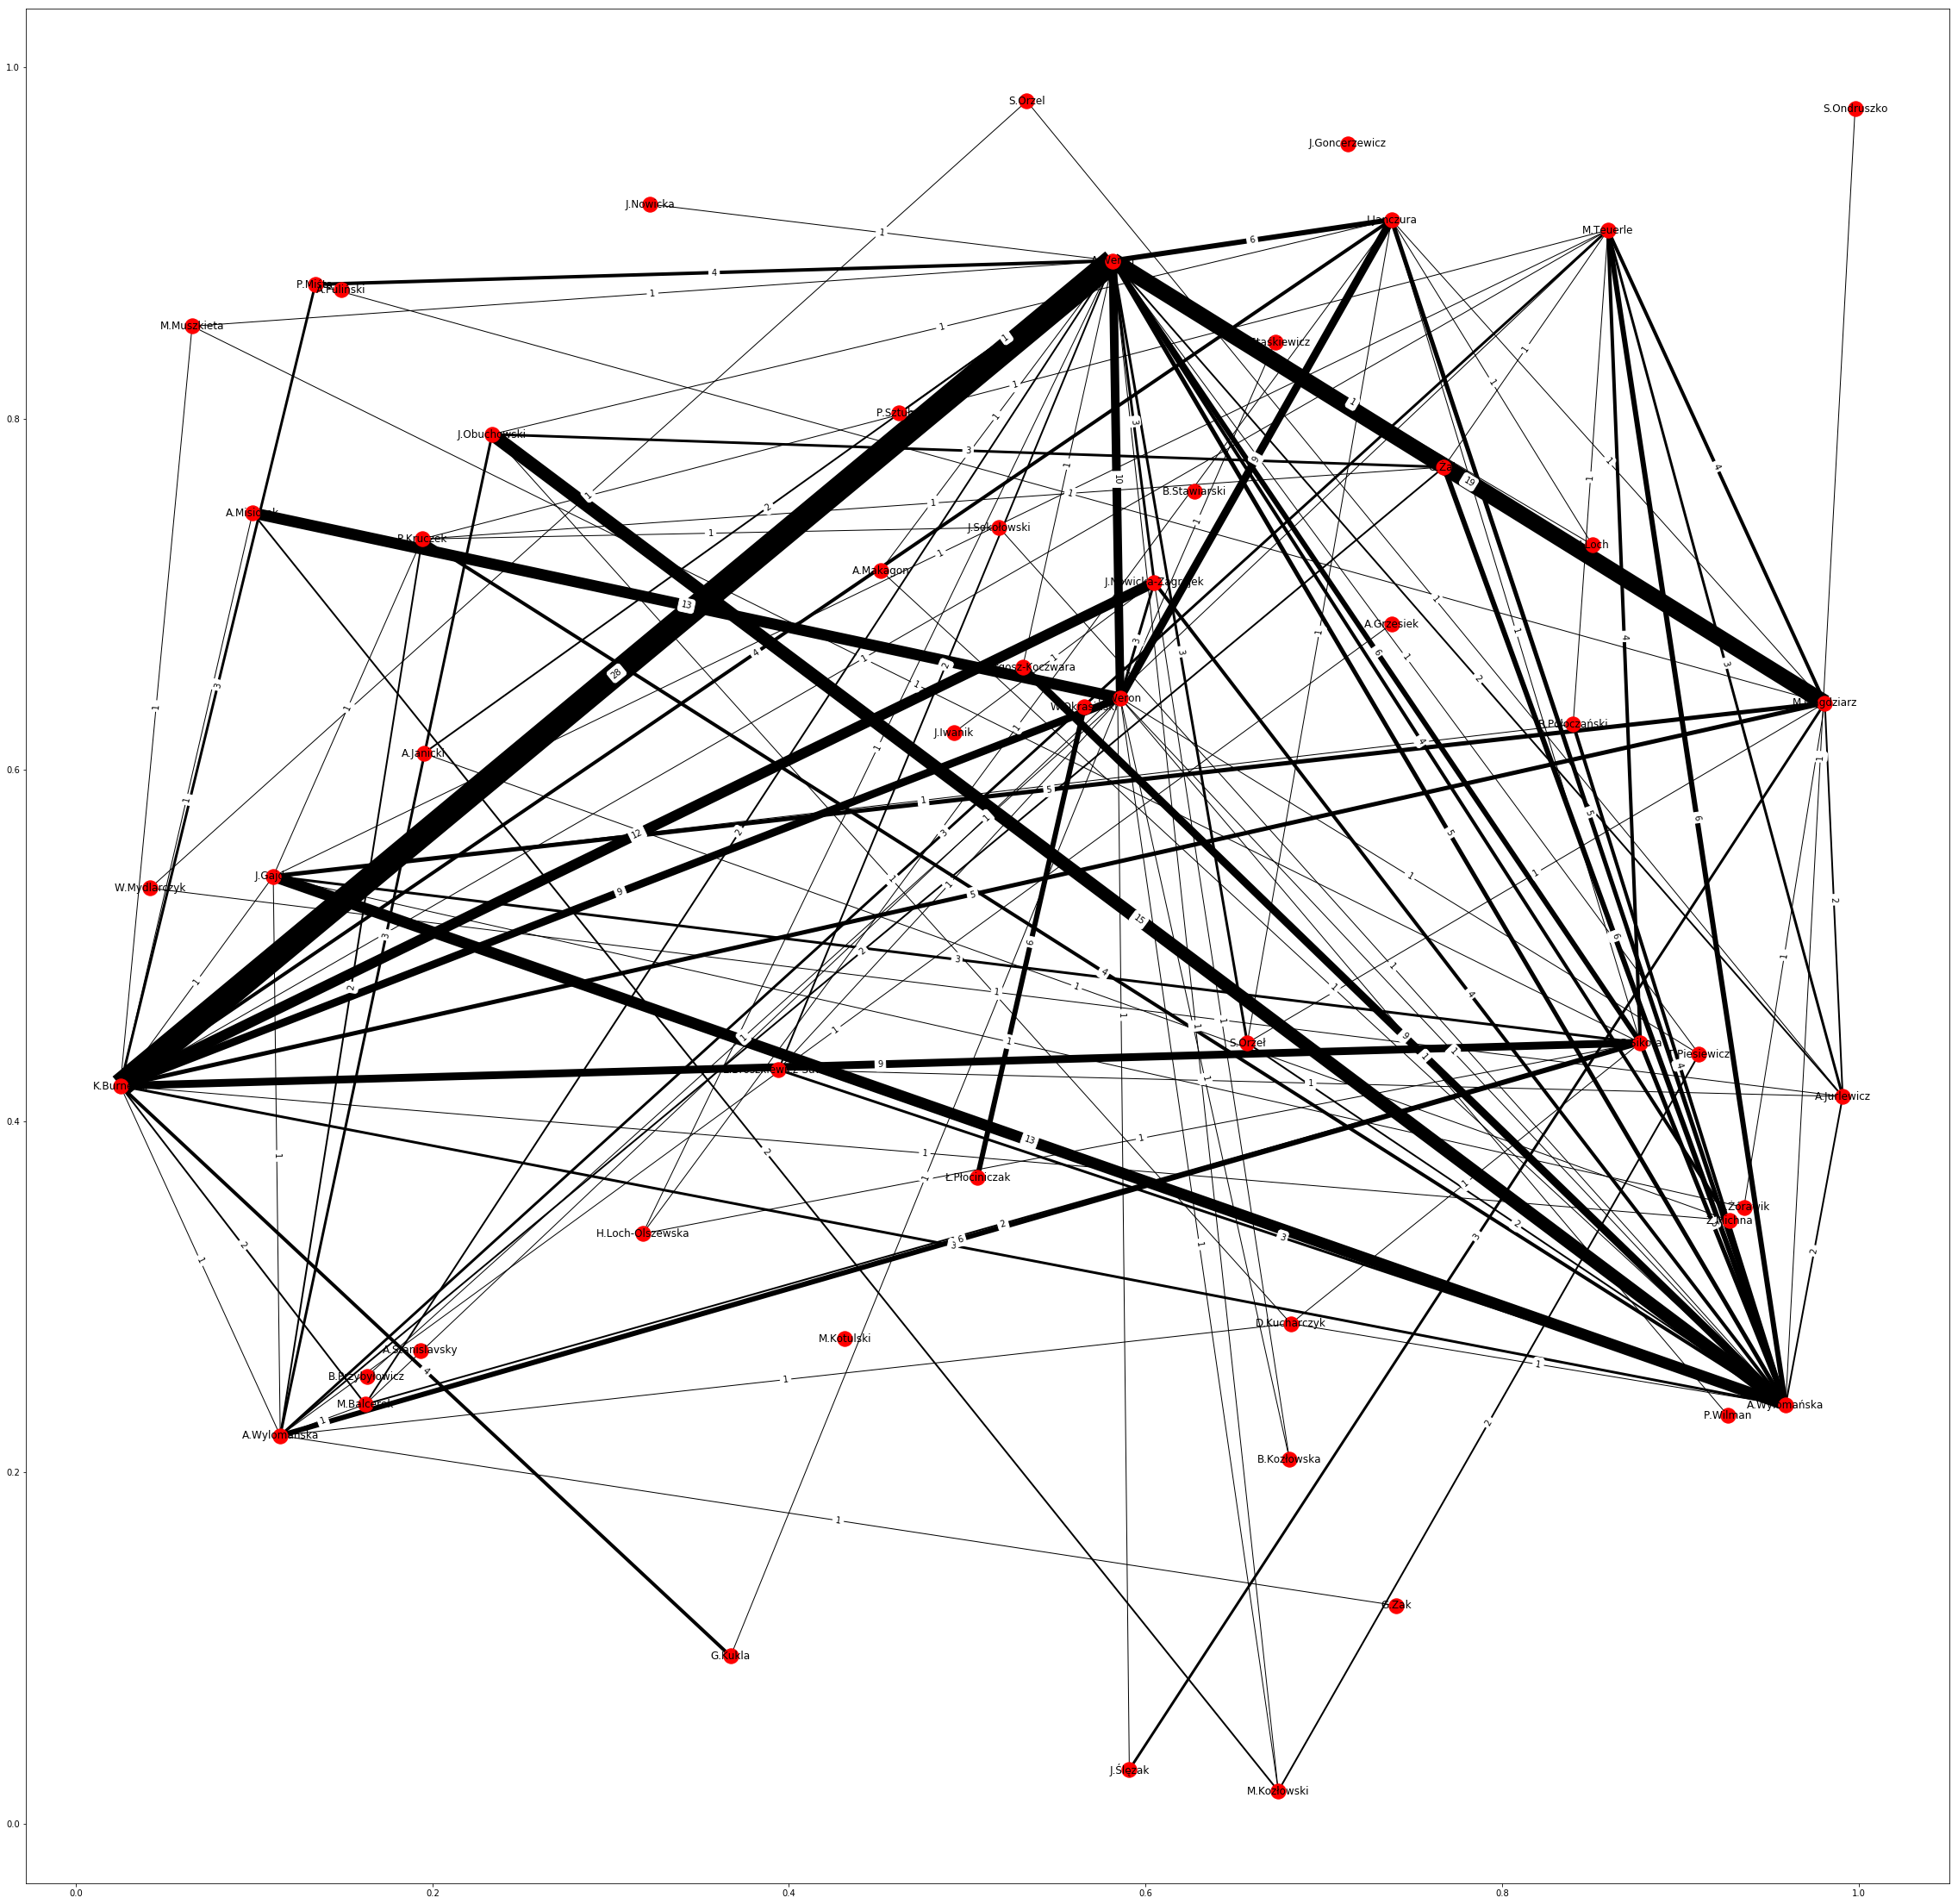

In [83]:
plt.figure(figsize=(50,50))
node_pos=nx.get_node_attributes(G,'pos')
edge_labels = nx.get_edge_attributes(G,'weight')
pos = nx.kamada_kawai_layout(G)
#pos = nx.random_layout(G)
nx.draw_networkx_edges(G, pos, width = weights)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw_networkx_nodes(G, pos, node_size = np.multiply(list(nodes_dict.values()),100))
nx.draw_networkx_labels(G, pos)
plt.savefig('network_of_authors.png')

plt.show()

KeyError: 'A.Jurlewicz'

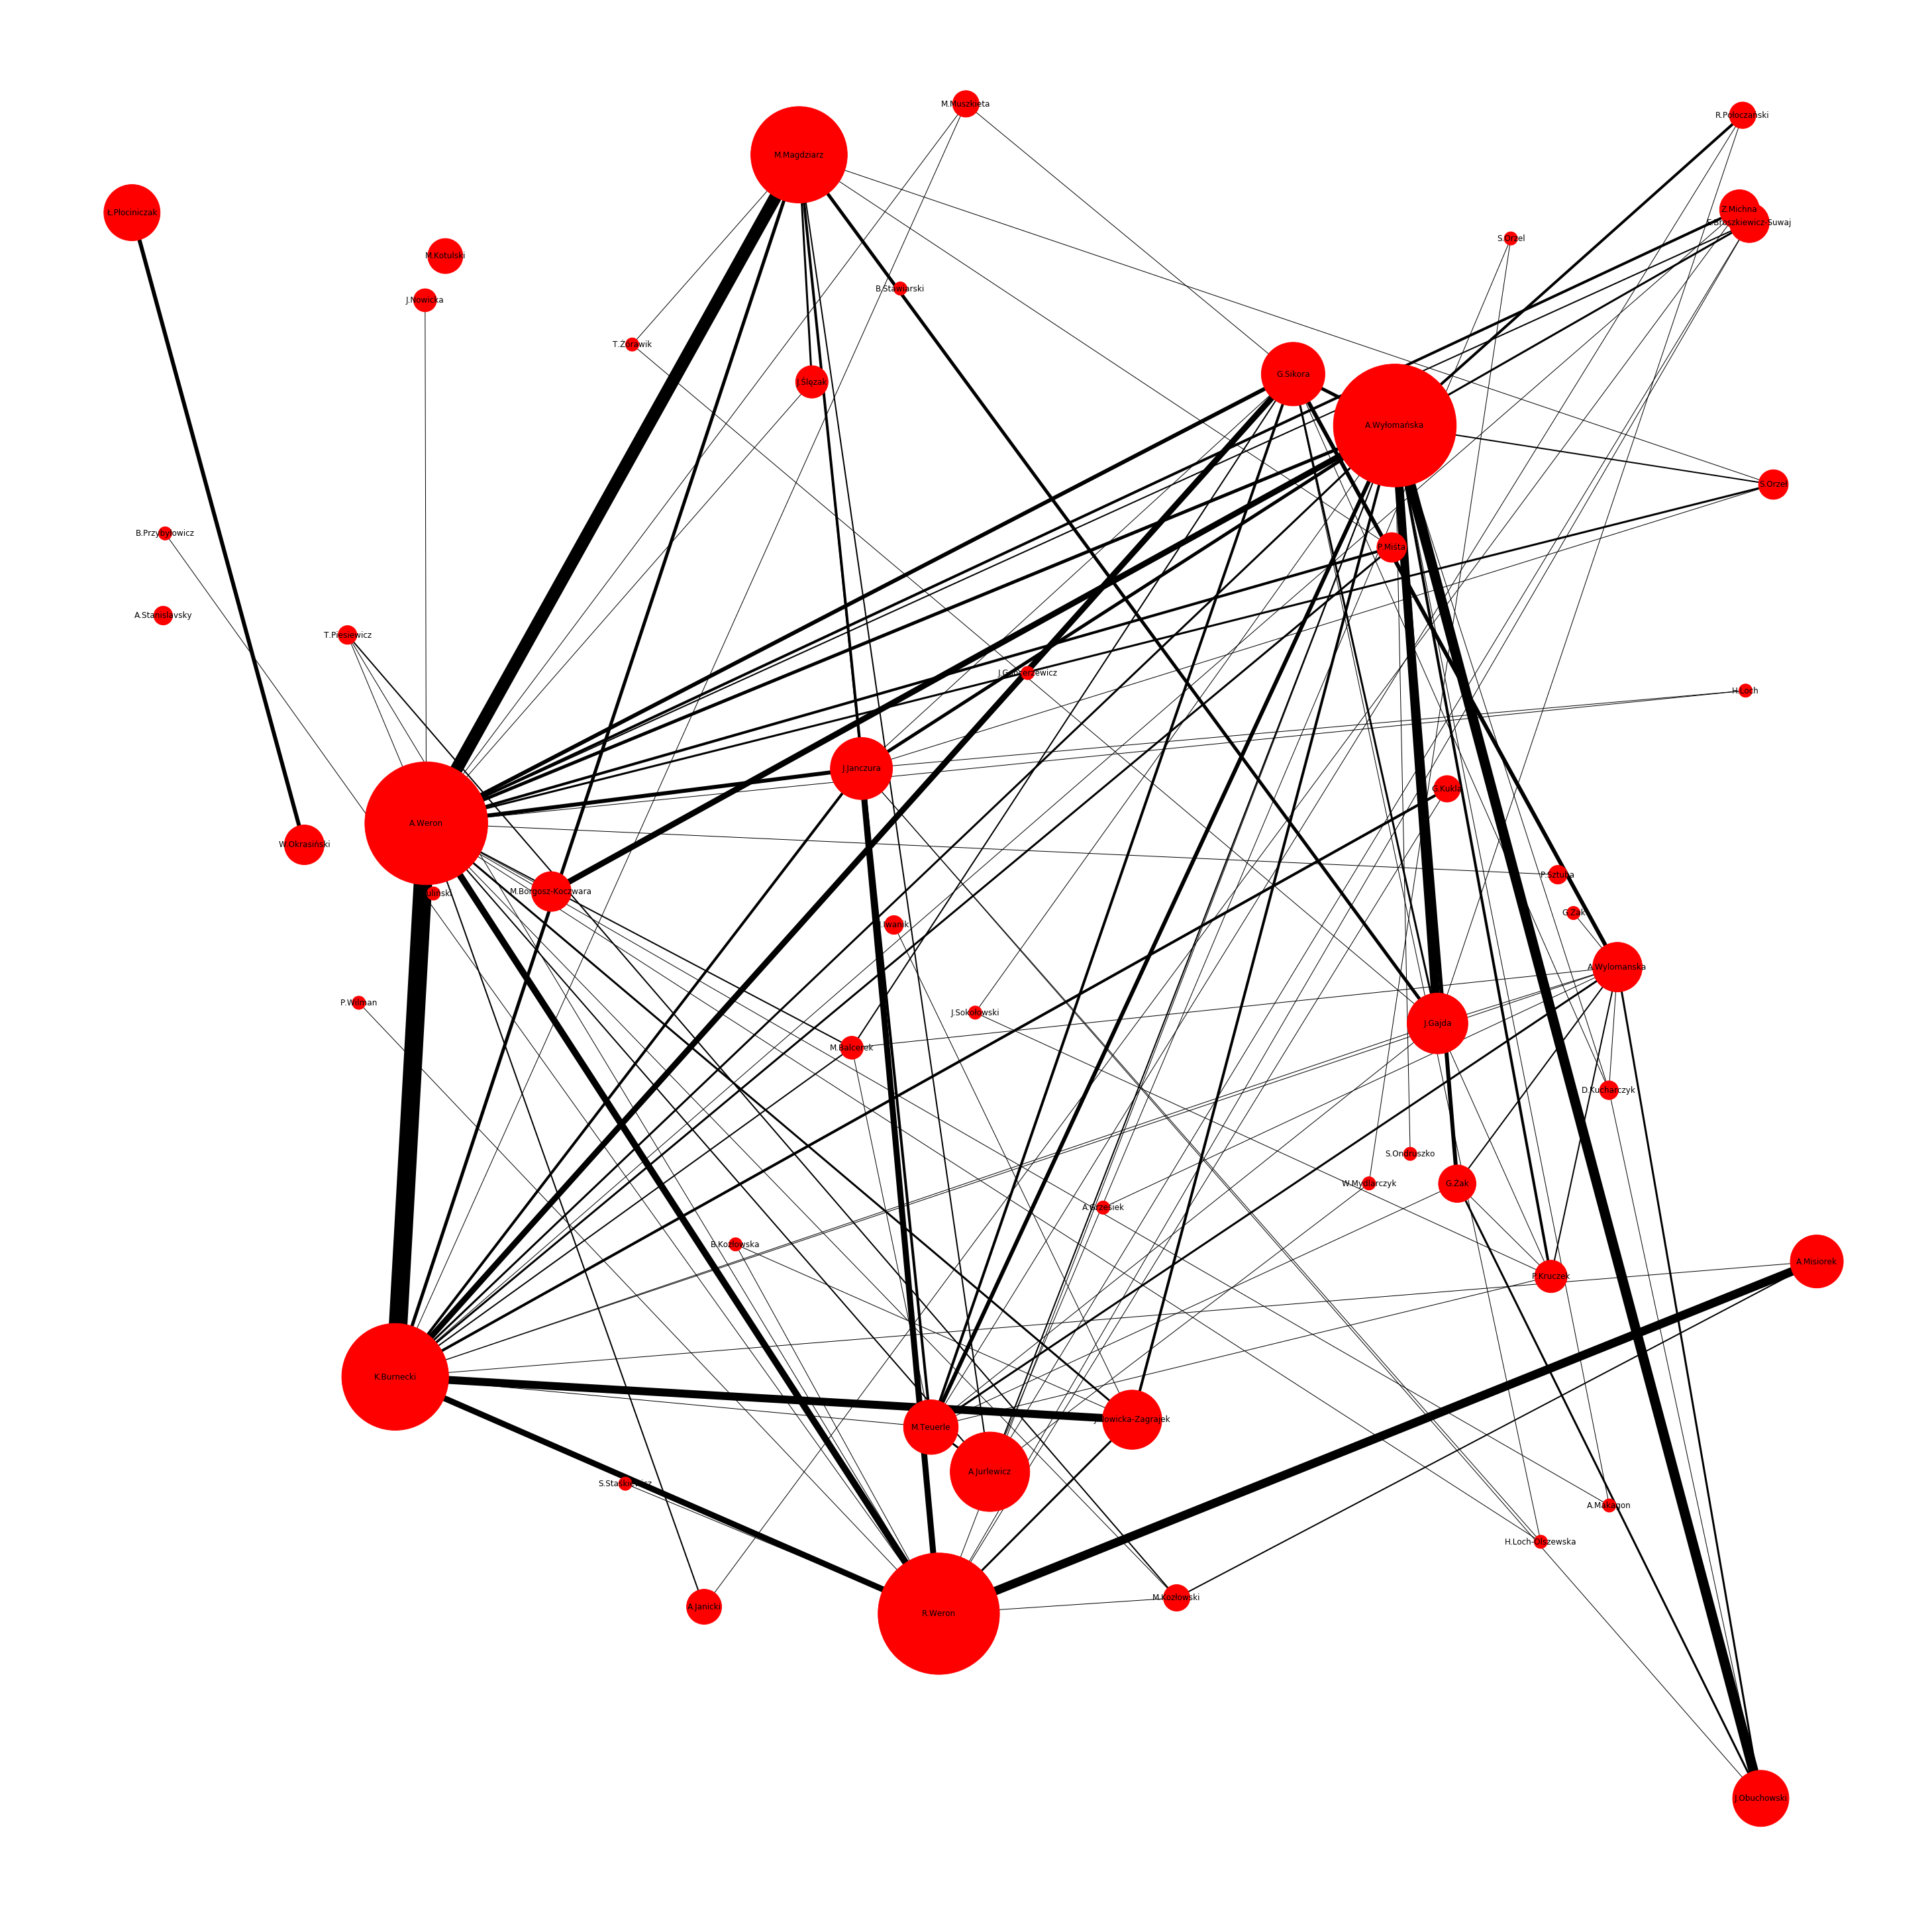

In [82]:
plt.figure(figsize=(40,40))
nx.draw_random(G, with_labels=True, node_size = np.multiply(list(nodes_dict.values()),100), width = weights)
plt.savefig('network.png')
node_pos=nx.get_node_attributes(G,'pos')
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edges(G, node_pos)
nx.draw_networkx_edge_labels(G,node_pos,edge_labels=edge_labels)

plt.show()